In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


In [2]:
path = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'

data = pd.read_csv(path, header=None)


In [3]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [21]:
features = data.drop(140, axis=1)
target = data[140]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [22]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.transform(x_test)

In [23]:
class AutoEncoder(tf.keras.Model):
    def __init__(self, output_units):
        super(AutoEncoder, self).__init__()
        # Define the encoder layers
        self.encoder = tf.keras.Sequential([
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu')
        ])

        # Define the decoder layers
        self.decoder = tf.keras.Sequential([
            Dense(32, activation='relu'),
            Dense(64, activation='relu'),
            Dense(output_units, activation='sigmoid')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded




In [24]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

# Fit the model
history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled),
    shuffle=True
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0117 - mse: 0.0284 - val_loss: 0.0104 - val_mse: 0.0252
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0099 - mse: 0.0239 - val_loss: 0.0080 - val_mse: 0.0191
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0075 - mse: 0.0178 - val_loss: 0.0058 - val_mse: 0.0140
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - mse: 0.0132 - val_loss: 0.0048 - val_mse: 0.0113
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047 - mse: 0.0109 - val_loss: 0.0044 - val_mse: 0.0103
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0044 - mse: 0.0102 - val_loss: 0.0043 - val_mse: 0.0100
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043 - mse: 0.0099 - val_loss: 0.0042 - val_mse: 0.0098
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0042 - mse: 0.0097 - val_loss: 0.0041 - val_mse: 0.0096
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - mse: 0.0093 - 

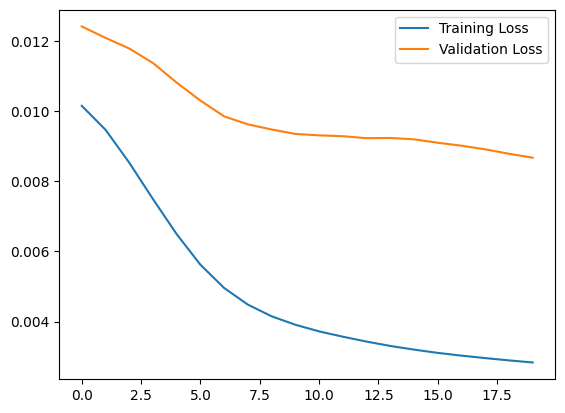

In [16]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.404
